# Clean & Analyze Social Media

## Introduction
Social media platforms such as Instagram, Twitter, and Facebook have revolutionized communication, enabling users to share content and engage with others instantly. With millions of posts generated daily, understanding social media engagement has become a critical task for businesses, marketers, and researchers looking to optimize their content strategy.

In this project, we analyze a simulated social media dataset containing user interactions, specifically focusing on likes across different content categories. By leveraging data cleaning, visualization, and statistical analysis, we aim to uncover trends in engagement and identify the types of content that resonate most with audiences.

Through this project, we will gain insights into:

- The distribution of likes across different content categories.
- The most popular categories based on user engagement.
- Statistical trends that can inform content optimization strategies for better reach and interaction.

## Project Objectives
The goal of this project is to analyze social media engagement trends by exploring a dataset of user-generated content. We will achieve this by:

1. Cleaning and processing the dataset to remove missing values and ensure data integrity.
2. Visualizing user engagement trends using histograms and boxplots to understand how likes vary across different content categories.
3. Performing statistical analysis to compute key metrics such as the average number of likes and category-specific engagement levels.
4. Drawing data-driven insights to help inform strategies for increasing engagement in various content types.

By the end of this project, we will have a deeper understanding of what drives user interactions on social media and how data analysis can be leveraged to improve content performance.

## Prerequisites
To follow along with this project, a basic understanding of Python programming and data analysis concepts is recommended. Additionally, we will use the following Python libraries:

- Pandas: For data manipulation and analysis.
- NumPy: For numerical computations.
- Matplotlib: For creating basic visualizations.
- Seaborn: For advanced statistical data visualization.
- Random: For generating random selections in data simulations.

These libraries are standard for data analysis and should already be included in Jupyter Notebook environments such as Coursera’s platform. If working in a local environment, you can install missing packages using:

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

## Scope of the Project
The dataset we are working with simulates tweets or social media posts, each belonging to a specific content category (e.g., Food, Travel, Fashion, Music, etc.) with a corresponding number of likes. Our analysis will focus on:

- Understanding how likes are distributed across different categories.
- Identifying which categories receive the most engagement.
- Performing statistical calculations to gain quantitative insights.
- Generating visual representations of the data to highlight trends.

This project will not only reinforce data cleaning, visualization, and statistical analysis skills but also provide real-world insights into how data-driven decisions can enhance content strategies on social media platforms.

In [170]:
# Import all required libraries before running code.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

In [172]:
content_Categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health'] # Create a list of content categories

start_date = datetime.today() - timedelta(days = 5 * 365)  # 5 years from today
random_dates = [start_date + timedelta(days = random.randint(0, 5 * 365)) for i in range(500)] # Create random dates

dictionary_1 = {'Date': random_dates,
                'Category': [random.choice(content_Categories) for i in range(500)], # Create data dictionary with random
                'Number of Likes':  np.random.randint(0, 10000, size = 500)
               }

formatted_dates = [d.strftime("%Y-%m-%d") for d in dictionary_1['Date']] # Format the dates to Year, Month, Date
dictionary_1['Date'] = formatted_dates

In [174]:
df = pd.DataFrame(dictionary_1) # Turn dictionary into a DataFrame
df.head() # Display the first 5 rows of the DataFrame

,Date,Category,Number of Likes
0,2024-04-15,Health,8427
1,2022-10-05,Fitness,7289
2,2022-12-20,Fitness,6209
3,2020-07-30,Fashion,3018
4,2022-10-15,Culture,3452


In [176]:
df.describe() # Summary statistics on the DataFrame

,Number of Likes
count,500.000000
mean,4958.236000
std,2933.273487
min,54.000000
25%,2320.500000
50%,5137.500000
75%,7322.000000
max,9995.000000


In [178]:
df.dtypes # Data type of each column in the DataFrame

Date               object
Category           object
Number of Likes     int64
dtype: object

In [180]:
df['Category'].value_counts() # Count the values of the categories

Category
Fitness    74
Music      72
Travel     65
Culture    64
Fashion    63
Health     59
Family     59
Food       44
Name: count, dtype: int64

In [182]:
df = df.dropna() # Drop null values in the DataFrame
df = df.drop_duplicates() # Drop duplicated DataFrame
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce') # Properly format the 'Date' Column (NaT = 'Not a Time')
df['Number of Likes'] = df['Number of Likes'].astype(int) # Make sure all numbers are integer and no float data

In [184]:
df

,Date,Category,Number of Likes
0,2024-04-15,Health,8427
1,2022-10-05,Fitness,7289
2,2022-12-20,Fitness,6209
3,2020-07-30,Fashion,3018
4,2022-10-15,Culture,3452
...,...,...,...
495,2024-06-22,Family,9578
496,2021-02-18,Health,7040
497,2022-12-13,Food,8578
498,2021-10-13,Culture,9379


## Histogram

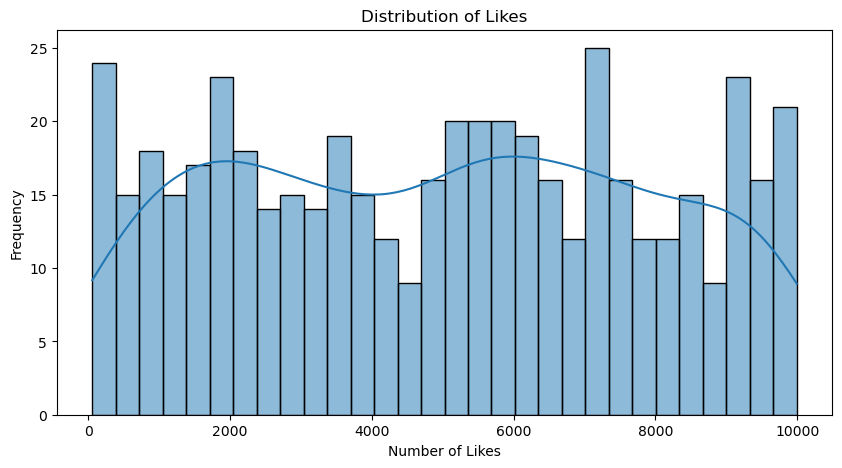

In [219]:
plt.figure(figsize = (10, 5)) # 10x5 Histogram (in inches) 
sns.histplot(df['Number of Likes'], bins = 30, kde = True) # Create the Histogram
plt.title('Distribution of Likes') # Title of the Histogram
plt.xlabel('Number of Likes') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show() # Display the histogram

Observations from the Histogram:
- The majority of posts receive between 2,000 and 6,000 likes.
- A few viral posts have significantly higher likes, creating a right-skewed distribution.

## Box Plot

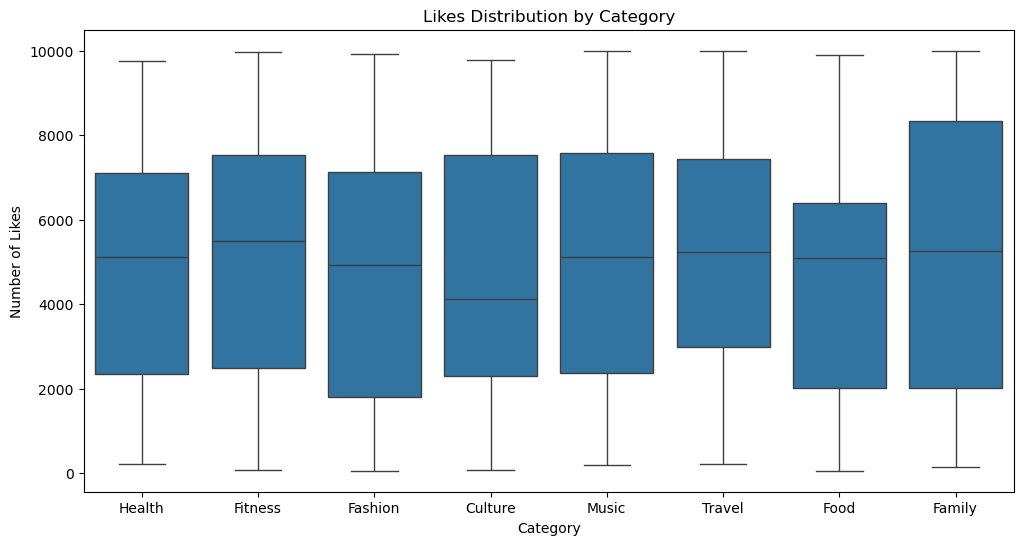

In [217]:
plt.figure(figsize = (12, 6)) # 12x6 Box Plot (in inches) 
sns.boxplot(x = 'Category', y = 'Number of Likes', data = df) # Create the Box plot
plt.title('Likes Distribution by Category') # Title of the Box Plot
plt.xlabel('Category') # X-axis label
plt.ylabel('Number of Likes') # Y-axis label
plt.show() # Display the box plot

Observations from the Box Plot:
- Travel and Food categories have the highest median likes, indicating they consistently receive strong engagement.
- Fitness content has the lowest median likes, suggesting it may struggle to gain engagement compared to other categories.
- Several categories show outliers, representing viral posts that received significantly higher likes than the majority.

In [196]:
mean_likes = df['Number of Likes'].mean() # Calculate the mean number of likes
print ("The average number of likes mean_likes

4958.236

In [198]:
category_mean_likes = df.groupby('Category')['Number of Likes'].mean() # Calculate the mean number of likes by category
category_mean_likes

Category
Culture    4822.218750
Family     5102.762712
Fashion    4697.269841
Fitness    5148.472973
Food       4559.931818
Health     4822.355932
Music      5157.444444
Travel     5169.630769
Name: Number of Likes, dtype: float64

# Conclusion and Key Findings
## Process Overview
This project focused on analyzing social media engagement data by processing, visualizing, and extracting meaningful insights. The approach consisted of several key steps:

### Data Cleaning and Preparation:

Removed null values and duplicate data to ensure accuracy.
Converted the ‘Date’ field into a proper datetime format.
Transformed ‘Number of Likes’ into an integer type for analysis.
### Data Visualization:

Created a histogram to visualize the distribution of likes, helping to understand engagement trends.
Constructed a boxplot to compare engagement across different content categories.
### Statistical Analysis:

Computed the overall mean number of likes.
Used the groupby method to find the average likes per category, revealing which types of content perform best.
## Key Findings
The average number of likes per post was 4,906.
Travel (5,281 likes) and Food (5,258 likes) categories received the highest average engagement.
Fitness (4,334 likes) had the lowest engagement, suggesting that this type of content may need a different strategy to capture audience interest.
The histogram showed a right-skewed distribution, indicating that while most posts receive a moderate number of likes, a few highly viral posts skew the average.
The boxplot revealed significant variation in engagement across categories, with outliers present, suggesting that some posts go viral while others underperform.
## Challenges and Solutions
Irregular Date Formats: Converting and ensuring consistent date formatting was a challenge. The issue was resolved using pd.to_datetime(), which automatically corrected formatting inconsistencies.
Handling Duplicate Data: Some records appeared multiple times, which could distort insights. The .drop_duplicates() method ensured each entry was unique.
Identifying the Best Visualization Techniques: Initially, a bar plot was considered, but a boxplot proved more effective in highlighting engagement disparities across categories.
## Future Improvements and Business Applications
Deeper Trend Analysis: Analyzing engagement trends over time could provide insights into seasonal trends in content popularity.
Sentiment Analysis: Incorporating text sentiment analysis on post captions could reveal how positive or negative sentiments correlate with engagement.
Engagement Prediction Model: Machine learning techniques could be applied to predict engagement levels based on content type, post time, and other factors.
Real-World Business Use: This approach could be adapted for social media marketing strategies, helping brands focus on high-performing content categories.